# Final Project II: Logistic Regression dan SVM

## Perkenalan

* Oleh:
1. Muhammad Rofi Ariansyah (PYTN - KS17 - 05)
2. Lathif Nur Irsyad (PYTN - KS17 - 07)
3. Anita bae (PYTN - KS17 - 09)

Dataset "Rain in Australia" adalah dataset cuaca yang mencatat pengamatan cuaca di berbagai lokasi di Australia. Dataset ini mencakup data sehari-hari tentang berbagai faktor cuaca seperti suhu, kelembaban, kecepatan angin, hujan, dan lain-lain. Data ini digunakan untuk berbagai tujuan, termasuk pemodelan prediksi hujan, analisis cuaca jangka panjang, dan penelitian ilmiah terkait cuaca.

Dataset "Rain in Australia" biasanya terdiri dari berbagai atribut atau kolom yang mencakup informasi terkait cuaca dan hujan di Australia. Atribut-atribut umum yang ada dalam dataset ini antara lain:

1. Date: Tanggal pengamatan cuaca.
2. Location: Lokasi di Australia di mana pengamatan cuaca dilakukan.
3. MinTemp: Suhu minimum dalam derajat Celsius.
4. MaxTemp: Suhu maksimum dalam derajat Celsius.
5. Rainfall: Jumlah hujan yang terjadi dalam milimeter.
6. Evaporation: Penguapan dalam milimeter.
7. Sunshine: Jumlah jam sinar matahari dalam sehari.
8. WindGustDir: Arah angin kencang.
9. WindGustSpeed: Kecepatan angin kencang dalam kilometer per jam.
10. WindDir9am: Arah angin pada pukul 9 pagi.
11. WindDir3pm: Arah angin pada pukul 3 sore.
12. WindSpeed9am: Kecepatan angin pada pukul 9 pagi dalam kilometer per jam.
13. WindSpeed3pm: Kecepatan angin pada pukul 3 sore dalam kilometer per jam.
14. Humidity9am: Kelembaban pada pukul 9 pagi.
15. Humidity3pm: Kelembaban pada pukul 3 sore.
16. Pressure9am: Tekanan udara pada pukul 9 pagi dalam hektopaskal.
17. Pressure3pm: Tekanan udara pada pukul 3 sore dalam hektopaskal.
18. Cloud9am: Awan pada pukul 9 pagi (dalam okta).
19. Cloud3pm: Awan pada pukul 3 sore (dalam okta).
20. Temp9am: Suhu pada pukul 9 pagi dalam derajat Celsius.
21. Temp3pm: Suhu pada pukul 3 sore dalam derajat Celsius.
22. RainToday: Apakah hujan turun hari itu (Ya/Tidak).
23. RainTomorrow: Apakah hujan diprediksi akan turun besok (Ya/Tidak).


## *Import* Pustaka yang Dibutuhkan

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
#Library For DataFrame
import pandas as pd
import numpy as np

#Library For datetime
import datetime
import calendar

#Library for Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

# Library for analysis
import scipy
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import max_error,mean_absolute_error,median_absolute_error,mean_squared_error,r2_score
import pickle
import joblib as jb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import preprocessing
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

## Data *Loading*

In [ ]:
path = '/content/weatherAUS.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Mengetahui jumlah baris dan kolom
df.shape

(145460, 23)

In [ ]:
# Untuk melihat atribut di dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

## Data Cleaning

### Melihat Missing Value

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df['Date'].isnull().sum()

0

In [ ]:
#mengubah date menjadi datetime
df['Date']=pd.to_datetime(df['Date'])

### Memisahkan kolom kategori dan numerik

In [ ]:
numeric_col=df.select_dtypes(include=np.number).columns.tolist()
cate_col=df.select_dtypes(include='object').columns.tolist()
print(numeric_col)
print("-"*50)
print(cate_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
--------------------------------------------------
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Menghapus data yang tidak dibutuhkan
df = df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

### Mengisi Missing value

In [ ]:
# Mengisi missing value pada kolom numeric
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
                   'WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm',
                   'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for column in numeric_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [ ]:
# Mengisi missing value pada kolom categorical dengan data yang paling sering
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
                       'RainTomorrow', 'Location']

for column in categorical_columns:
    mode_value = df[column].mode().values[0]
    df[column].fillna(mode_value, inplace=True)

In [ ]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Data Eksplorasi

Membuat sebuah visualisasi data dengan mneggunakan pie chart agar mudah terbaca, data yang diambil di pie chart ini adalah rainfall untuk mengetahui proporsi hujan dan tidak hujan

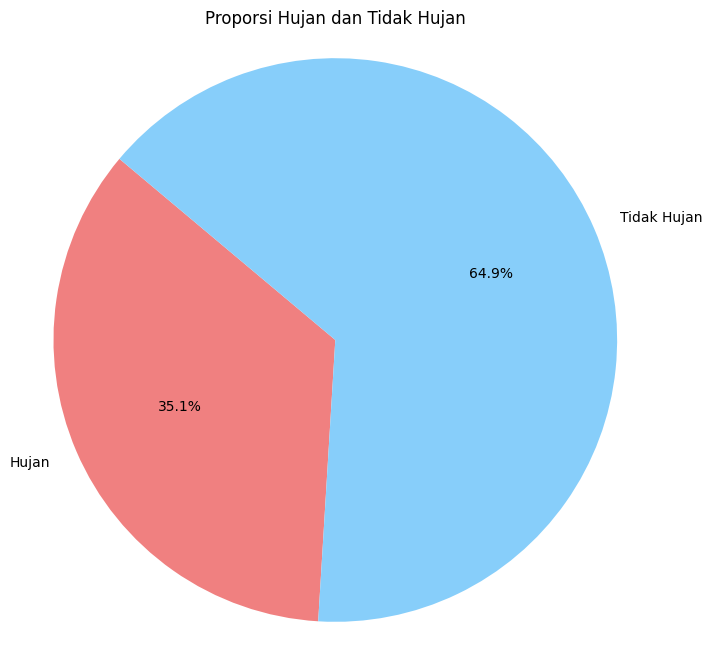

In [ ]:
# Menghitung jumlah data hujan dan tidak hujan
rainy = df[df['Rainfall'] > 0]
non_rainy = df[df['Rainfall'] == 0]
total_count = len(df)

# Proporsi data hujan dan tidak hujan
rainy_count = len(rainy)
non_rainy_count = len(non_rainy)

# Membuat label untuk pie chart
labels = ['Hujan', 'Tidak Hujan']
sizes = [rainy_count / total_count, non_rainy_count / total_count]
colors = ['lightcoral', 'lightskyblue']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.title("Proporsi Hujan dan Tidak Hujan")
plt.show()


Membuat visualisasi data max temperatur dan min temperatur menggunkan bar chart agar mudah dipahami,katherin menjadi lokasi dengan suhu tertinggi dan Darwin menjadi kota dengan suhu terdingin

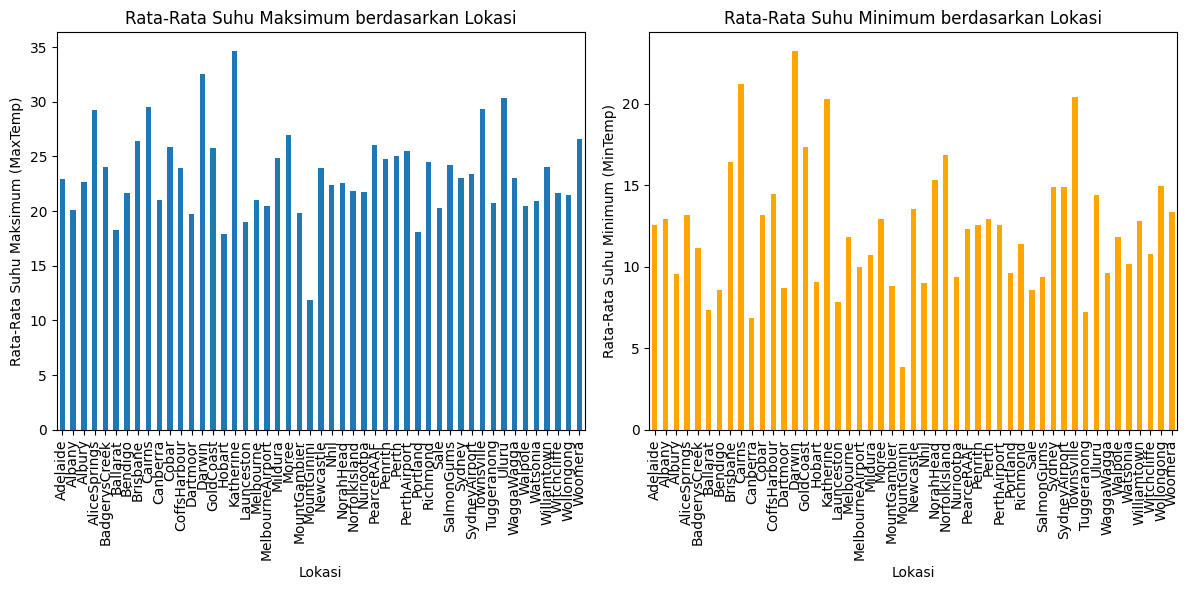

In [ ]:
# Membuat fungsi untuk menghitung rata-rata suhu maksimum berdasarkan lokasi
def max_temp_by_location(df):
    max_temp_avg = df.groupby("Location")["MaxTemp"].mean()
    return max_temp_avg

# Membuat fungsi untuk menghitung rata-rata suhu minimum berdasarkan lokasi
def min_temp_by_location(df):
    min_temp_avg = df.groupby("Location")["MinTemp"].mean()
    return min_temp_avg

# Memanggil fungsi
max_temp_avg_by_location = max_temp_by_location(df)
min_temp_avg_by_location = min_temp_by_location(df)

# Membuat dua plot bar yang berbeda
plt.figure(figsize=(12, 6))

# Plot untuk rata-rata suhu maksimum
plt.subplot(1, 2, 1)
max_temp_avg_by_location.plot(kind="bar")
plt.title("Rata-Rata Suhu Maksimum berdasarkan Lokasi")
plt.xlabel("Lokasi")
plt.ylabel("Rata-Rata Suhu Maksimum (MaxTemp)")
plt.xticks(rotation=90)

# Plot untuk rata-rata suhu minimum
plt.subplot(1, 2, 2)
min_temp_avg_by_location.plot(kind="bar", color='orange')
plt.title("Rata-Rata Suhu Minimum berdasarkan Lokasi")
plt.xlabel("Lokasi")
plt.ylabel("Rata-Rata Suhu Minimum (MinTemp)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

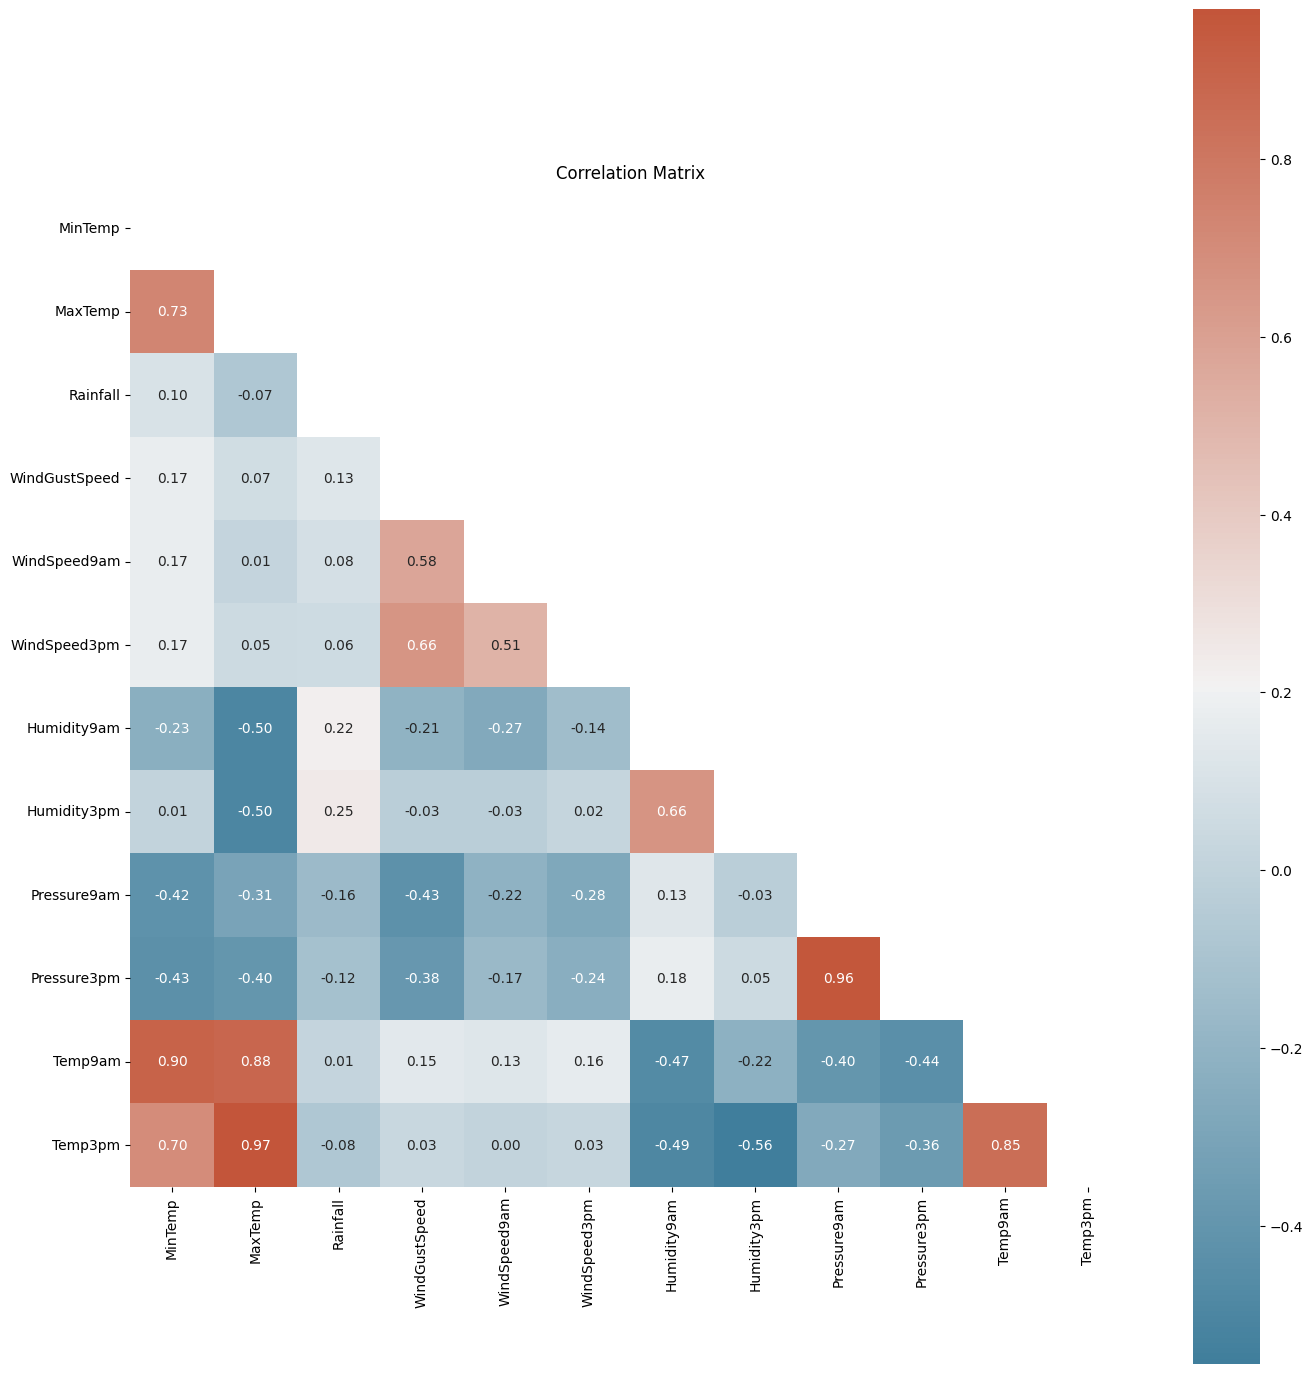

In [ ]:
plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(df.corr()))

# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()

## Preprocessing

### Encoding


In [ ]:
# Mengecek kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Menggunakan fungsi dummies untuk mengkodekan kolom kategorikal menjadi variabel dummy
data_encoded = pd.get_dummies(df, columns=categorical_cols)

# Menampilkan dataset yang telah diubah
data_encoded.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)



encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns=['Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
                       'RainTomorrow']))
])

#Membuat variabel df_rfe untuk menampung hasil encode
data_encoded = encoding_pipeline.fit_transform(df)

In [ ]:
x_transform = data_encoded.drop(["Date"], axis=1)
print(x_transform.shape)

(145460, 18)


In [ ]:
data_encoded.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


### Feature Selection

Memilih fitur apa saja yang akan di ambil untuk pelatihan model, kita memilih fitur fitur ini karna telah mengecek menggunakan sfs dengan hasil fitur fitur ini lah yang terbaik, namun untuk sfs tidak kami tampilkan di note book karena mempengaruhi proses pelatihan model menjadi sangat lambat

In [ ]:
selected_feature=data_encoded[[
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'RainToday']]

## Model

### Logistic Regression dan Support Vector Machine
Logistic regression adalah jenis analisis statistik yang sering digunakan data analyst untuk pemodelan prediktif. Dalam pendekatan analitik ini, variabel dependennya terbatas atau kategoris, bisa berupa A atau B (regresi biner) atau berbagai opsi hingga A, B, C atau D (regresi multinomial). Jenis analisis statistik digunakan dalam software statistik untuk memahami hubungan antara variabel dependen dan satu atau lebih variabel independen dengan memperkirakan probabilitas.

Support Vector Machine (SVM) adalah salah satu algoritma machine learning dengan pendekatan supervised learning yang bekerja dengan mencari hyperplane atau fungsi pemisah terbaik untuk memisahkan kelas. Algoritma SVM memiliki konsep dan dasar matematis yang mapan sehingga menjadi algoritma yang populer. Algoritma ini dapat digunakan untuk klasifikasi (SVM classification) dan regresi (SVM regression).

Alasan Memilih Logistic Regression dan Support Vector Machine
Dalam pendefinisian model kami menggunakan model LogisticRegression dan SVM untuk memprediksi RainTomorrow. Alasan mengapa kami memilih 2 model tersebut:

1. Logistic Regression

  Mudah untuk diinterpretasikan. Model ini menghasilkan probabilitas kelas yang dapat diartikan sebagai kepercayaan model terhadap kelas target.
  Cukup efisien dan memiliki waktu komputasi yang cepat, terutama pada dataset yang relatif besar.

2. Support Vector Machine

  Dapat bekerja dengan baik pada dataset yang memiliki dimensi tinggi dan jumlah fitur yang besar.
  SVM juga memiliki dukungan untuk menangani data yang tidak seimbang (imbalanced data) dengan memberikan bobot pada setiap sampel dalam proses pembelajaran.

Pemisahan atribut dan label

In [ ]:
X = selected_feature
y = data_encoded['RainTomorrow']

Pembagian dataset menjadi data pelatihan dan data pengujian

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standarisasi atribut

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Pelatihan Model

Membuat model SVM

In [ ]:
model1 = SVC(kernel='linear')

Membuat model regresi logistik

In [ ]:
model2 = LogisticRegression()

### Evaluasi Model

#### Model SVM

In [ ]:
 # Melatih model
svm_model = model1.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred_test = svm_model.predict(X_test)

# Melakukan prediksi pada data pelatihan
y_pred_train = svm_model.predict(X_train)

# Mengukur performa model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

class_report_test = classification_report(y_test, y_pred_test)

print(f'Akurasi (Data Pengujian): {accuracy_test:.2f}')
print(f'Akurasi (Data Pelatihan): {accuracy_train:.2f}')
print(f'Laporan Klasifikasi (Data Pengujian):\n{class_report_test}')


Akurasi (Data Pengujian): 0.79
Akurasi (Data Pelatihan): 0.79
Laporan Klasifikasi (Data Pengujian):
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     22672
           1       0.68      0.06      0.11      6420

    accuracy                           0.79     29092
   macro avg       0.73      0.53      0.50     29092
weighted avg       0.76      0.79      0.71     29092



Matrik konfusi

In [ ]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(f'Matrix Konfusi (Data Pengujian):\n{conf_matrix_test}')

Matrix Konfusi (Data Pengujian):
[[22469   203]
 [ 5993   427]]



Mari kita interpretasikan setiap elemen dari matrix konfusi untuk hasil prediksi data "RainTomorrow" yang mencakup dua kelas: "Ya" (1) dan "Tidak" (0).

- **True Positives (TP):** 427
  - Ini adalah jumlah observasi yang sebenarnya adalah "Ya" (RainTomorrow=1) dan juga diprediksi dengan benar sebagai "Ya".

- **True Negatives (TN):** 22469
  - Ini adalah jumlah observasi yang sebenarnya adalah "Tidak" (RainTomorrow=0) dan juga diprediksi dengan benar sebagai "Tidak".

- **False Positives (FP):** 203
  - Ini adalah jumlah observasi yang sebenarnya adalah "Tidak" (RainTomorrow=0), tetapi diprediksi sebagai "Ya".

- **False Negatives (FN):** 5993
  - Ini adalah jumlah observasi yang sebenarnya adalah "Ya" (RainTomorrow=1), tetapi diprediksi sebagai "Tidak".

  **KESIMPULAN**
  
  Model memiliki jumlah True Positives (TP) yang rendah (427) dan jumlah False Negatives (FN) yang tinggi (5993). Ini menunjukkan bahwa model mungkin kurang sensitif dalam memprediksi kejadian "Ya" (RainTomorrow=1)


#### Model Logistic Regression

In [ ]:
# Melatih model
logreg_model = model2.fit(X_train, y_train)

# Melakukan prediksi pada data pelatihan
y_pred_train_log = logreg_model.predict(X_train)

# Melakukan prediksi pada data pengujian
y_pred_test = logreg_model.predict(X_test)

# Mengukur performa model terhadap data pelatihan
accuracy_train = accuracy_score(y_train, y_pred_train_log)

# Mengukur performa model terhadap data pengujian
accuracy_test = accuracy_score(y_test, y_pred_test)

class_report_test = classification_report(y_test, y_pred_test)

print(f'Akurasi (Data Pelatihan): {accuracy_train:.2f}')
print(f'Akurasi (Data Pengujian): {accuracy_test:.2f}')
print(f'Laporan Klasifikasi (Data Pengujian):\n{class_report_test}')


Akurasi (Data Pelatihan): 0.81
Akurasi (Data Pengujian): 0.81
Laporan Klasifikasi (Data Pengujian):
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     22672
           1       0.64      0.27      0.38      6420

    accuracy                           0.81     29092
   macro avg       0.73      0.62      0.63     29092
weighted avg       0.78      0.81      0.77     29092



Matrik konfusi

In [ ]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(f'Matrix Konfusi (Data Pengujian):\n{conf_matrix_test}')

Matrix Konfusi (Data Pengujian):
[[21686   986]
 [ 4659  1761]]



- **True Positives (TP):** 1955
  - Jumlah observasi yang sebenarnya adalah "Ya" (RainTomorrow=1) dan juga diprediksi dengan benar sebagai "Ya".

- **True Negatives (TN):** 21620
  - Jumlah observasi yang sebenarnya adalah "Tidak" (RainTomorrow=0) dan juga diprediksi dengan benar sebagai "Tidak".

- **False Positives (FP):** 1052
  - Jumlah observasi yang sebenarnya adalah "Tidak" (RainTomorrow=0), tetapi diprediksi sebagai "Ya".

- **False Negatives (FN):** 4465
  - Jumlah observasi yang sebenarnya adalah "Ya" (RainTomorrow=1), tetapi diprediksi sebagai "Tidak".

**KESIMPULAN**

Ada peningkatan dalam jumlah True Positives (TP) dari matrix sebelumnya, sekarang menjadi 1955, yang mengindikasikan perbaikan dalam kemampuan model untuk memprediksi kejadian "Ya". Namun, jumlah False Positives (FP) juga meningkat.

## Model inference

In [ ]:
selected_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  int64  
 5   WindGustSpeed  145460 non-null  float64
 6   RainToday      145460 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 7.8 MB


In [ ]:
# Membuat salinan data set
test= data_encoded.copy()

In [ ]:
# menghitung jumlah missing value
test.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
# Menampilkan data 10 teratas
test.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
5,2008-12-06,2,14.6,29.7,0.2,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0
6,2008-12-07,2,14.3,25.0,0.0,13,50.0,12,13,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0
7,2008-12-08,2,7.7,26.7,0.0,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0
8,2008-12-09,2,9.7,31.9,0.0,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1
9,2008-12-10,2,13.1,30.1,1.4,13,28.0,8,10,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1,0


In [ ]:
# Memilih atribut untuk prediksi atau inference
to_inference = {'Location' : [2],
 'MinTemp' : [17.1],
 'MaxTemp' : [34.4],
 'Rainfall' : [0.2],
 'WindGustDir' : [14],
 'WindGustSpeed' : [50],
 'RainToday' : [0]}

In [ ]:
pd.DataFrame(to_inference)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday
0,2,17.1,34.4,0.2,14,50,0


In [ ]:
# Menggabungkan data set test dengan data set to_inference
test = pd.concat ([test, pd.DataFrame(to_inference)], ignore_index=True)

In [ ]:
test

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,13,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.0
1,2008-12-02,2,7.4,25.1,0.0,14,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.0
2,2008-12-03,2,12.9,25.7,0.0,15,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0
3,2008-12-04,2,9.2,28.0,0.0,4,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0.0
4,2008-12-05,2,17.5,32.3,1.0,13,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145456,2017-06-22,41,3.6,25.3,0.0,6,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0.0
145457,2017-06-23,41,5.4,26.9,0.0,3,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0.0
145458,2017-06-24,41,7.8,27.0,0.0,9,28.0,10.0,3.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0.0
145459,2017-06-25,41,14.9,22.6,0.0,13,39.0,2.0,2.0,17.0,17.0,62.0,36.0,1020.2,1017.9,15.0,20.9,0,0.0


In [ ]:
#memprediksi nilai price menggunakan model logistic regression yang telah dilatih
RainTomorrowLog= y_pred_train_log

In [ ]:
RainTomorrowSVM= y_pred_train

In [ ]:
# Menampilkan hasil inference Logistic Regression
np.set_printoptions(threshold=np.inf)
print(RainTomorrowLog)

[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 1 1 

In [ ]:
# Menghitung total No dan Yes dari hasil inference logreg
Total_Zeros = np.count_nonzero(RainTomorrowLog == 0)
Total_Ones = np.count_nonzero(RainTomorrowLog == 1)

print("Total No", Total_Zeros)
print("Total Yes", Total_Ones)

Total No 105342
Total Yes 11026


In [ ]:
# Menampilkan hasil inference SVM
np.set_printoptions(threshold=np.inf)
print(RainTomorrowSVM)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 

In [ ]:
# Menghitung total No dan Yes dari hasil inference logreg
Total_Zeros = np.count_nonzero(RainTomorrowSVM == 0)
Total_Ones = np.count_nonzero(RainTomorrowSVM == 1)

print("Total No", Total_Zeros)
print("Total Yes", Total_Ones)

Total No 113913
Total Yes 2455


## Kesimpulan

In [ ]:
pickle.dump(logreg_model, open('model_logreg.pkl', "wb"))

In [ ]:
pickle.dump(svm_model, open('model_svm.pkl', "wb"))


Dataset ini terdiri dari 145.460 baris dan 23 kolom. Dataset ini berisi tentang informasi pengamatan cuaca harian dari banyak lokasi di seluruh Australia selama sekitar 10 tahun.

1. Berdasarkan tingkat akurasi, logistic regression dan SVM menunjukkan nilai akurasi yang berbeda,untuk svm mendapatkan skor akurasi 79% dan Logistic Regression mendapat skor akurasi 81%. Dapat disimpulkan bahwa logistic regression lebih baik dan bagus untuk hasil prediksinya
2. Model berhasil digunakan untuk memprediksi RainTomorrow dengan value inference yang dipakai:
{'Location' : [2],
 'MinTemp' : [17.1],
 'MaxTemp' : [34.4],
 'Rainfall' : [0.2],
 'WindGustDir' : [14],
 'WindGustSpeed' : [50],
 'RainToday' : [0]} dengan menggunakan model logistic regression diperoleh hasil inference atau prediksi Total No 105342
Total Yes 11026 yang berarti adalah prediksi apakah besok akan hujan? adalah tidak, dan begitupun dengan hasil inference atau prediksi dengan menggunakan SVM Total No 113913
Total Yes 2455 yang berarti prediksi apakah bahwa besok hujan? adalah tidak

## Interface Menggunakan Streamlit

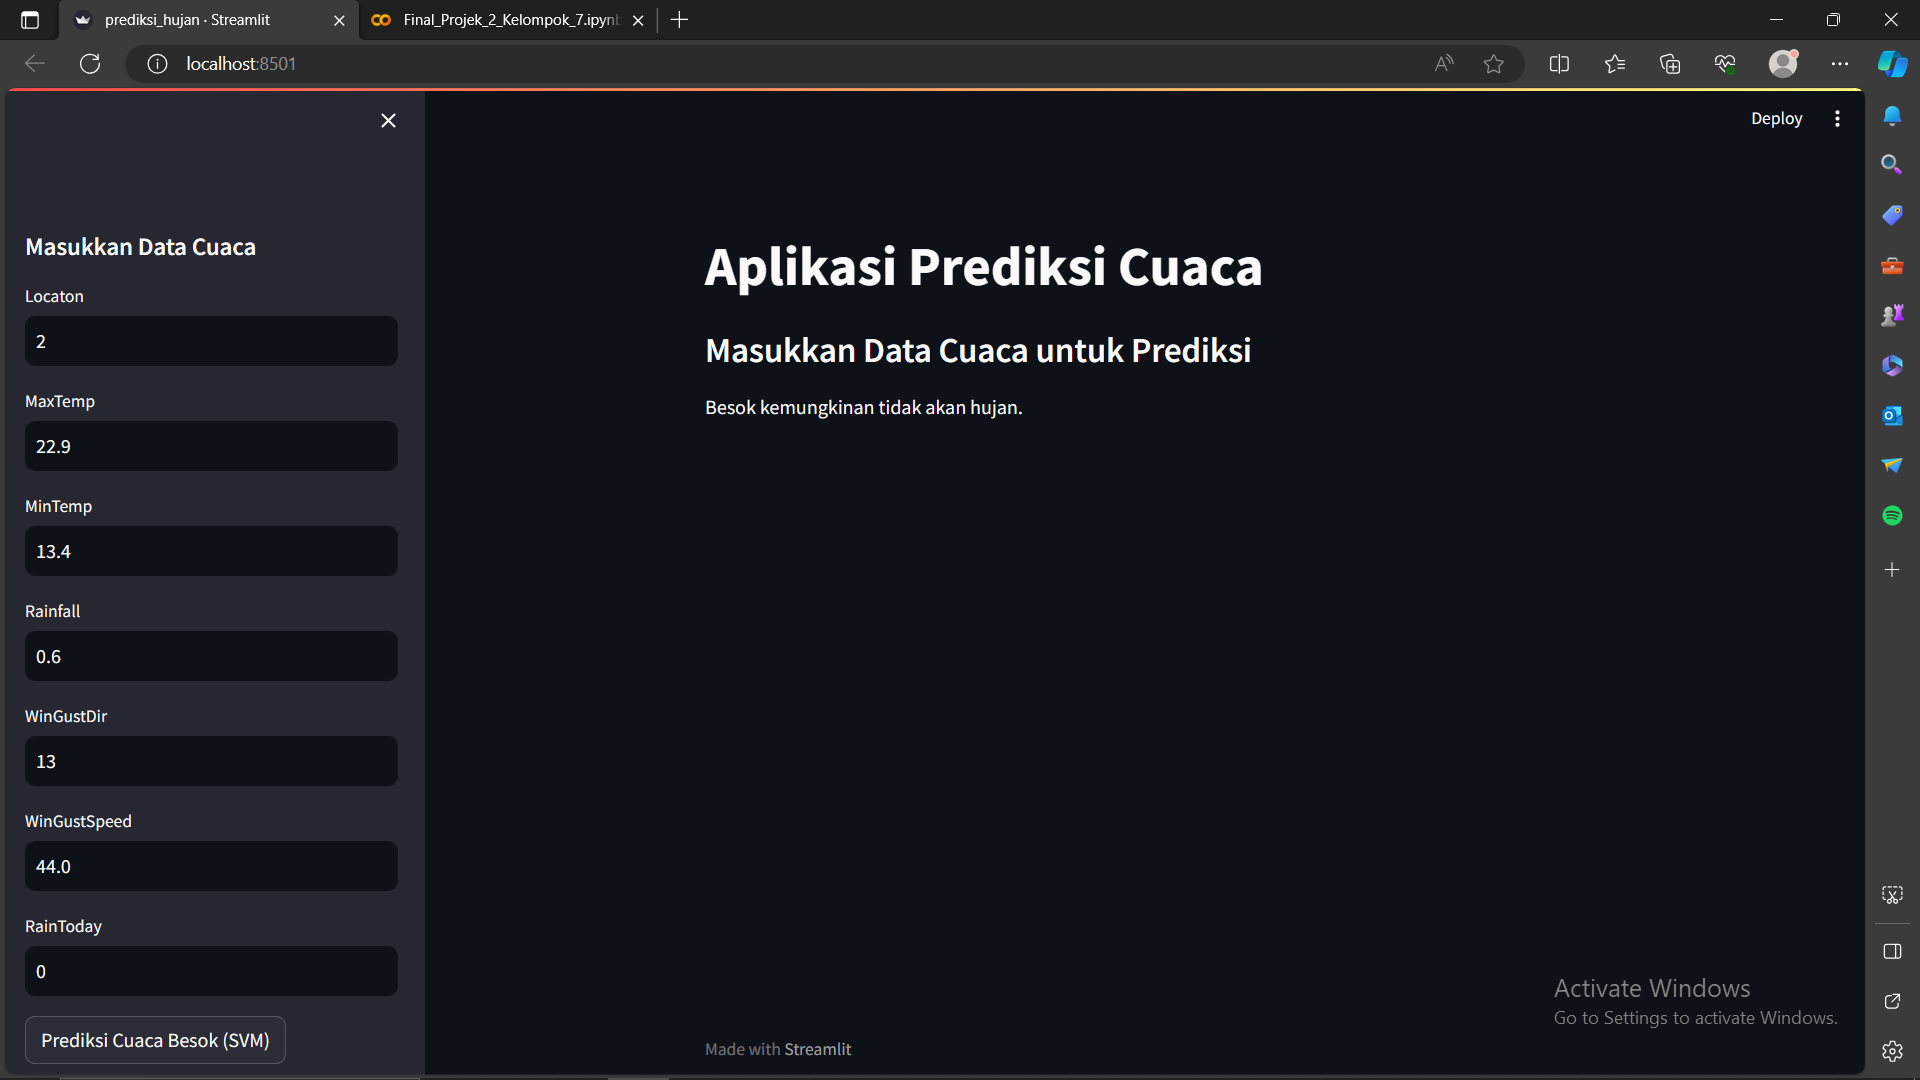

Prediksi hujan menggukka algoritma svm dengan data diatas dengan hasil kemungkinan besok tidak akan hujan

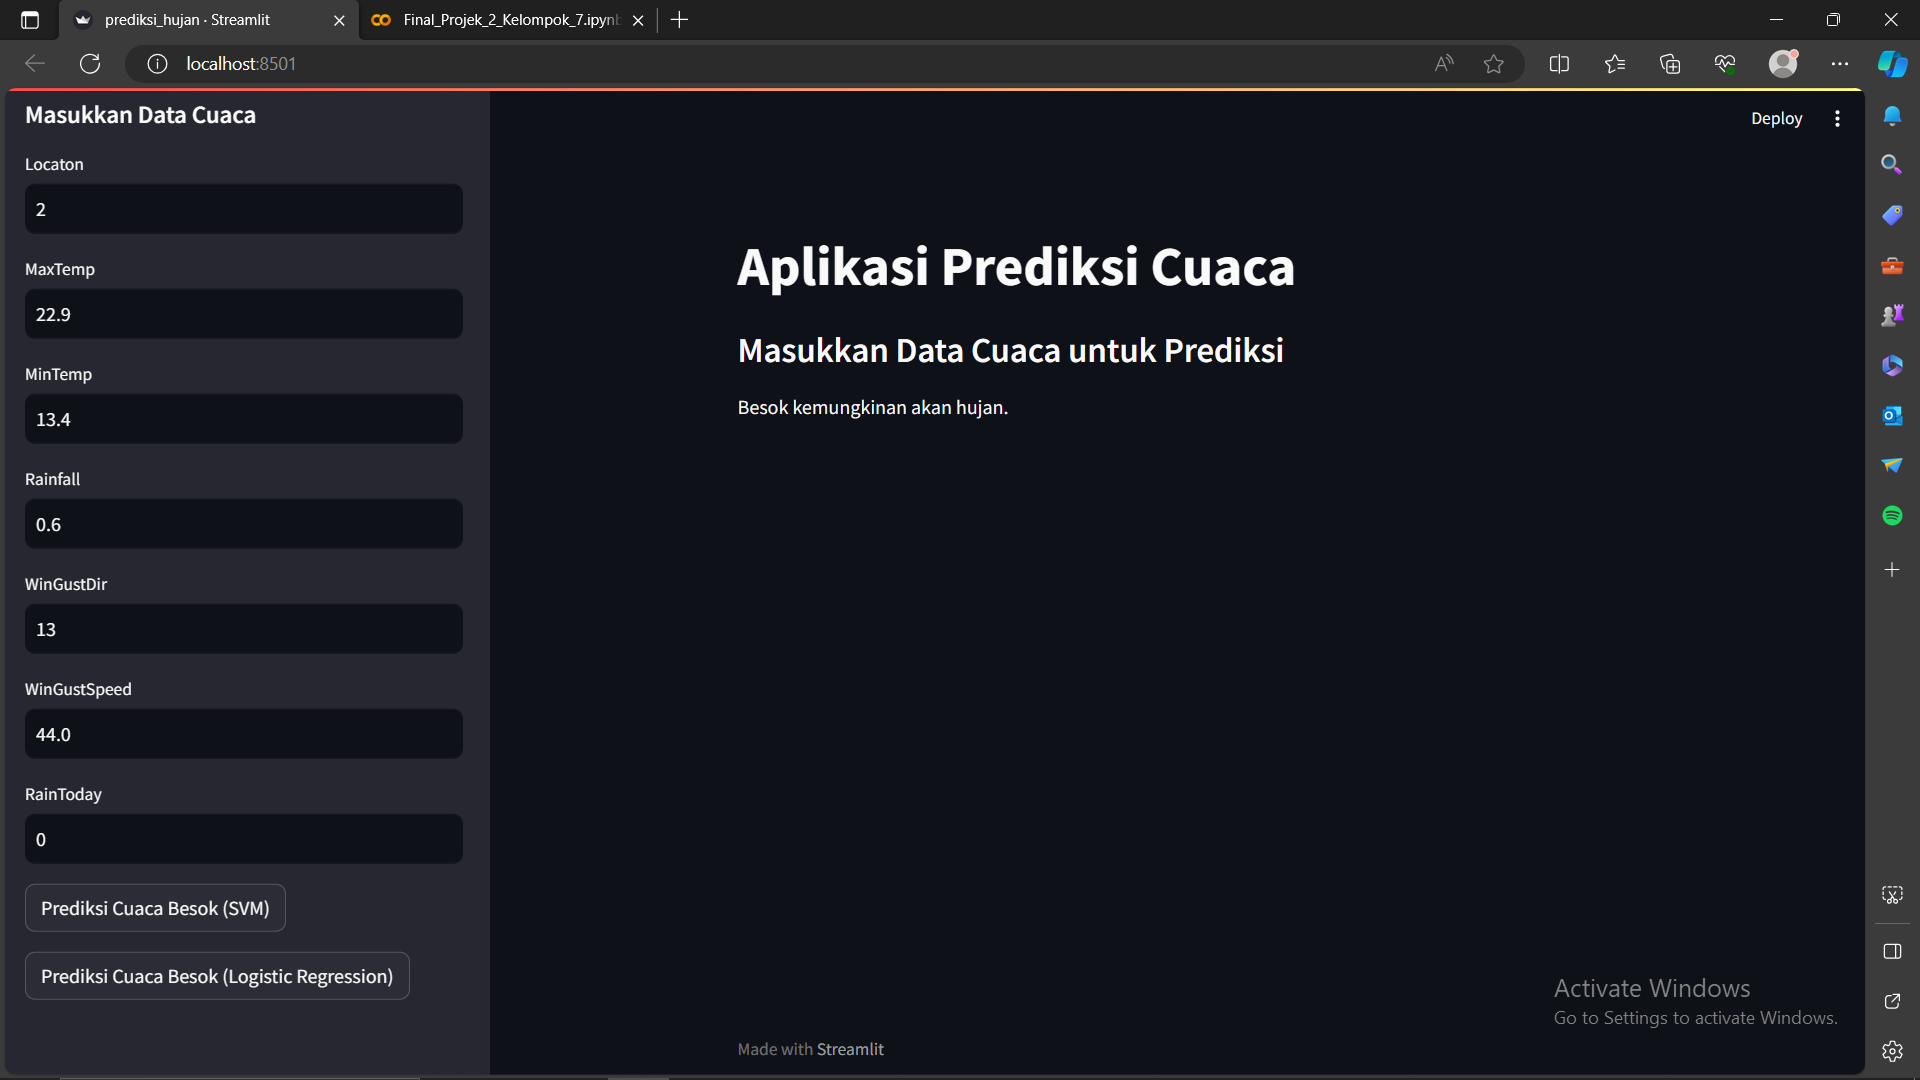

Prediksi hujan menggunakan algoritma Logistic regression dengan data diatas dengan hasil besok akan hujan